In [ ]:
# https://docs.upbit.com/reference/

In [40]:
import requests
import json
import pprint

# 마켓 리스트 https://api.upbit.com/v1/market/all 
MARKET_LIST_PATH = "market/all"


def send_request(path, method):
    API_HOST = "https://api.upbit.com/v1/"
    url = API_HOST + path
    headers = {'Content-Type': 'application/json', 'charset': 'UTF-8', 'Accept': '*/*'}
    body = {
        # "key1": "value1",
        # "key2": "value2"
    }
    
    try:
        if method.upper() == 'GET':
            response = requests.get(url, headers=headers)
        # elif method == 'POST':
        #     response = requests.post(url, headers=headers, data=json.dumps(body, ensure_ascii=False, indent="\t"))

        ret = json.loads(response.text)[0]
        # pprint.pprint(ret)

        return ret
    except Exception as ex:
        print(ex)
  

# 호출 예시
a = send_request(MARKET_LIST_PATH, "GET")


In [34]:

# 비트코인 현재 가격 예시 https://api.upbit.com/v1/ticker?markets=KRW-BTC
# 가격 호출
TICKER_PATH = "ticker?markets="
a = send_request(TICKER_PATH+"KRW-BTC", "GET")

[{'acc_trade_price': 58179215084.50273,
  'acc_trade_price_24h': 317161536025.2615,
  'acc_trade_volume': 1008.78129714,
  'acc_trade_volume_24h': 5558.46751506,
  'change': 'FALL',
  'change_price': 54000.0,
  'change_rate': 0.0009390814,
  'high_price': 57950000.0,
  'highest_52_week_date': '2024-01-11',
  'highest_52_week_price': 66779000.0,
  'low_price': 57345000.0,
  'lowest_52_week_date': '2023-03-10',
  'lowest_52_week_price': 26707000.0,
  'market': 'KRW-BTC',
  'opening_price': 57526000.0,
  'prev_closing_price': 57503000.0,
  'signed_change_price': -54000.0,
  'signed_change_rate': -0.0009390814,
  'timestamp': 1706340834834,
  'trade_date': '20240127',
  'trade_date_kst': '20240127',
  'trade_price': 57449000.0,
  'trade_time': '073354',
  'trade_time_kst': '163354',
  'trade_timestamp': 1706340834810,
  'trade_volume': 0.00857}]


In [42]:
# 일 봉 조회 https://api.upbit.com/v1/candles/days?count=1&market=KRW-BTC

a = send_request("candles/days?count=1&market=KRW-BTC", "GET")
a['trade_price']

57446000.0

In [77]:
pd.to_numeric('57,500,000'.replace(',',''))

57500000

In [82]:
import pandas as pd

df = pd.read_csv("BTC_KRW Upbit 과거 데이터.csv", usecols=[0, 1])
df['날짜'] = pd.to_datetime(df['날짜'])
df['종가'] = pd.to_numeric(df['종가'].str.replace(",",''))
df.set_index('날짜', inplace=True)
df.sort_index(inplace=True)
df

,종가
날짜,
2021-01-26,35930000
2021-01-27,34293000
2021-01-28,36616000
2021-01-29,37523000
2021-01-30,37029000
...,...
2024-01-22,54690000
2024-01-23,55389000
2024-01-24,55194000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2021-01-26 to 2024-01-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종가      1096 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB


<Axes: xlabel='날짜'>

c:\Users\jaedong\anaconda3\envs\crypto_prediction\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
c:\Users\jaedong\anaconda3\envs\crypto_prediction\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
c:\Users\jaedong\anaconda3\envs\crypto_prediction\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\jaedong\anaconda3\envs\crypto_prediction\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
c:\Users\jaedong\anaconda3\envs\crypto_prediction\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io

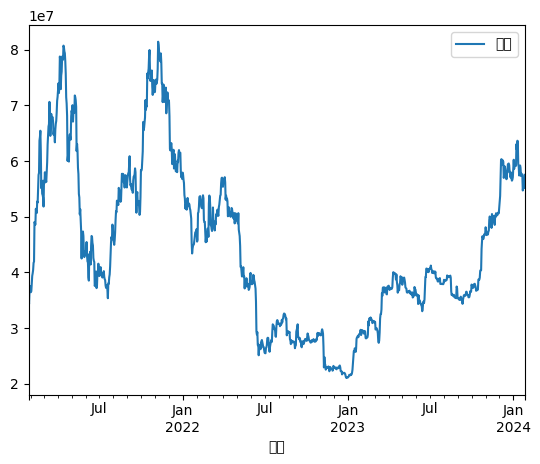

In [84]:
df.plot()